## Trabajo 1: Solución lineal de sistemas lineales en Julia

* Objetivo:Comparar diferentes métodos de resolución de sistemas lineales de gran tamaño con un problema de EDP que genera matrices no simétricas en base a los parámetros N, α y ε=1

$$\beta \cdot \bigtriangledown u-\epsilon \bigtriangleup u=0 $$

$$ \beta =\alpha (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})^T $$

Contenido: utilizar el código en python (basado en el código Matlab de A. Meister, Aufgabe 6) y las librerías Julia de C.T. Kelley en https://github.com/ctkelley

Metodología: realizar un notebook de jupyter en Julia con gráficas y tablas de errores y tiempos de cómputo en base a las iteraciones

In [155]:
using LinearAlgebra
using SparseArrays

# Parameters
a = 1;   # Advection parameter
b = 2;     # Reaction parameter
tol = 1e-6;    # Tolerance for stopping criterion
maxit = 100000;  # Maximum number of iterations

# Linear system
N = 100;
dx = 1 / (N + 1);

e = ones(N);
Dxx = spdiagm(-1 => e[1:N-1] , 0 => -2 * e  , 1 => e[1:N-1]);   # 1D central difference

ident = Matrix{Float64}(I, N, N);
x = kron(ident, Dxx) / (dx^2);  # 2nd derivative with respect to x

Axx = kron(ident, Dxx) / (dx^2); # 2nd derivative with respect to x
Ayy = kron(Dxx, ident) / (dx^2);  # 2nd derivative with respect to y

Dx = spdiagm( -1 => e[1:N-1] , 1 => e[1:N-1]);  # 1D central difference
Ax = kron(ident, Dx) / (2 * dx);

I_2 = sparse(Matrix{Float64}(I, N*N, N*N));

A = sparse(-Axx - Ayy - a * Ax - b * I_2);  # Matrix
b = ones(N * N);  # Right-hand side
u0 = 0.5 * ones(N * N);  # Initial guess

1. Utilizar métodos directo LU y Choleski para matrices simétricas, y los métodos iterativos CG, BiCG , BiCGStab , GMRES , LGMRES, MINRES, QMR que encuentren en las librerías de Julia. Si encuentran otros , los aportan

Metodos directos:

In [ ]:
import LinearAlgebra

#Calcular descomposicion LU
lu_decomposition = lu(A);
L = lu_decomposition.L;U = lu_decomposition.U;P = lu_decomposition.p;
#cholesky
using LinearAlgebra
#L_cholesky = cholesky(A);

Metodos iterativos:

In [184]:
import IterativeSolvers

#CG
xcg,hcg=cg(A,b,log=true);

#Bicg
#xbicg=bicg(A,b)

#bicgstabl
xbicgstabl,hbicgstabl=bicgstabl(A,b,log=true);

#gmres
#xgmres=gmres(A,b)

#minres
xminres,hminres = minres(A,b,log=true);

#qmr
#xqmr=qmr(A,b);



([-0.0005875348268453052, -0.001220809007146042, -0.0018771051132438028, -0.00254379123559346, -0.0032123158757552334, -0.0038760696018826104, -0.004529528483307466, -0.005167874430618004, -0.005786814007999881, -0.006382488390104686  …  -0.006382488390109481, -0.005786814008004431, -0.00516787443062187, -0.004529528483310812, -0.003876069601885604, -0.0032123158757578906, -0.002543791235595457, -0.0018771051132452888, -0.0012208090071470503, -0.0005875348268457484], Converged after 283 iterations.)

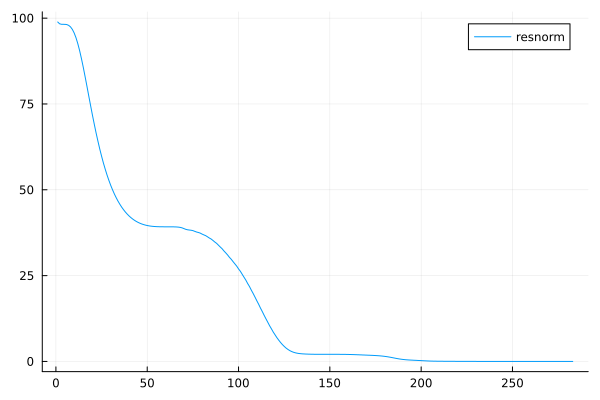

In [185]:
plot(hminres)

In [101]:
#LGMRESusing
using Krylov
xlgmres=gmres(A,b)

UndefVarError: UndefVarError: `gmres` not defined

2. Utilizar escenarios de N y α en base a la presentación . Utilizar el mayor N possible con tiempos esperables menos de una hora).

3. Calcular tiempos y errores en base a las iteraciones de los métodos iterativos y comparar con los métodos directos

4. Analizar los resultados y decidir el métodos más rápido y preciso para cada escenario de N y α.

5. Encontrar las propiedades de las matrices generadas por la linearización en redes neuronales y proponer qué método sería el major para problemas de alta dimensionalidad .